In [110]:
import pandas as pd
import json
import math
import datetime
import matplotlib.pyplot as plt

In [152]:
filename = 'WhatsApp Chat with Ben Cliente.txt'
df = pd.read_csv(filename, header=None, error_bad_lines=False,
                 encoding='utf8')
df = df.drop(0)
df.columns = ['Date', 'Chat']
Message = df['Chat'].str.split('-', n=1, expand=True)
df['Date'] = df['Date'].str.replace(',', '')
df['Time'] = Message[0]
df['content'] = Message[1]
Message1 = df['content'].str.split(':', n=1, expand=True)
df['content'] = Message1[1]
df['sender_name'] = Message1[0]
df = df.drop(columns=['Chat'])
df['content'] = df['content'].str.lower()
df['content'] = df['content'].str.replace('<media omitted>', 'MediaShared')
df['content'] = df['content'].str.replace('this message was deleted',
                                    'DeletedMsg')
df.dropna(inplace=True)
df["date_time"] = pd.to_datetime(df.Date + df.Time) 
df = df.reindex(columns=['date_time', 'sender_name', 'content'])
df["delta_mensajes_minutos"] = df.date_time.diff()[:].astype('timedelta64[m]')
df["delta_mensajes_horas"] = df.date_time.diff()[:].astype('timedelta64[h]')
df = df.set_index("date_time")

b'Skipping line 10: expected 2 fields, saw 3\nSkipping line 11: expected 2 fields, saw 3\nSkipping line 21: expected 2 fields, saw 3\nSkipping line 30: expected 2 fields, saw 3\nSkipping line 35: expected 2 fields, saw 3\nSkipping line 38: expected 2 fields, saw 3\nSkipping line 39: expected 2 fields, saw 3\nSkipping line 68: expected 2 fields, saw 3\nSkipping line 70: expected 2 fields, saw 3\nSkipping line 71: expected 2 fields, saw 3\nSkipping line 76: expected 2 fields, saw 3\nSkipping line 77: expected 2 fields, saw 3\nSkipping line 82: expected 2 fields, saw 3\nSkipping line 104: expected 2 fields, saw 3\nSkipping line 113: expected 2 fields, saw 3\nSkipping line 123: expected 2 fields, saw 3\n'


,sender_name,content,delta_mensajes_minutos,delta_mensajes_horas
date_time,,,,
2020-04-17 11:43:00,Ben Cliente,hola,NaN,NaN
2020-04-17 11:43:00,Ben Cliente,buenos días,0.0,0.0
2020-04-17 11:43:00,Gabo,hola buenos días,0.0,0.0
2020-04-17 11:45:00,Ben Cliente,como quieres que hagamos la videollamada?,2.0,0.0
2020-04-17 11:54:00,Gabo,estas en compu?,9.0,0.0
...,...,...,...,...
2020-05-29 21:01:00,Ben Cliente,pero puse 3 carpetas,1.0,0.0
2020-05-29 22:15:00,Gabo,si quiere podemos tener otra reunión el domingo,74.0,1.0
2020-05-29 22:15:00,Gabo,a qué hora le queda?,0.0,0.0


In [153]:
y = df.sender_name.groupby(df.index.hour).count()

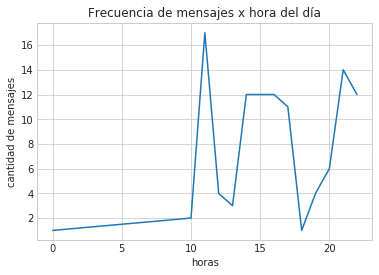

In [195]:
fig = plt.figure()
ax = plt.axes()
plt.title("Frecuencia de mensajes x hora del día")
plt.xlabel("horas")
plt.ylabel("cantidad de mensajes")
ax.plot(y.index, y)

In [156]:
df["is_q"] = df.apply(lambda x: True if ("?" in x["content"] or "¿" in x["content"]) else False, axis=1)

In [184]:
name_filter = df["sender_name"].str.strip()!='Gabo'

In [189]:
questions = df[df.is_q==True]

In [191]:
questions = questions[questions["sender_name"].str.strip()!='Gabo']

In [198]:
questions.content.values

array([' como quieres que hagamos la videollamada?', ' skype?',
       ' a qué correo te comparto las fotografías?',
       ' has visto algo del software?', ' tú qué tal?',
       ' ya están bien las fotografías para hacer las pruebas?',
       ' te parece a las 8?'], dtype=object)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

